In [1]:
import pandas as pd
import numpy as np
url2 = 'https://raw.githubusercontent.com/juarezefren/datasets/main/energy_efficiency_data_letras.csv'
df = pd.read_csv(url2)
df.shape

(768, 10)

In [2]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,B,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,C,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,D,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,E,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,B,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    object 
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 60.1+ KB


In [4]:
df['Orientation'].unique()

array(['B', 'C', 'D', 'E'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Orientation"] = le.fit_transform(df["Orientation"])
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,1,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0,0.0,0,20.84,28.28


In [6]:
df['Orientation'].unique()

array([0, 1, 2, 3])

In [7]:
X = df.iloc[:,0:8]
X.head(5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,0,0.0,0
1,0.98,514.5,294.0,110.25,7.0,1,0.0,0
2,0.98,514.5,294.0,110.25,7.0,2,0.0,0
3,0.98,514.5,294.0,110.25,7.0,3,0.0,0
4,0.90,563.5,318.5,122.50,7.0,0,0.0,0


<h1>Tomando como "y" a 'Heating_Load', la penultima columna</h1>

In [8]:
y = df.iloc[:,-2]
y.head(5)

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating_Load, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [10]:
modelo = DecisionTreeRegressor(random_state=None)

scores = cross_val_score(modelo, X, y,
                         scoring="r2",
                         cv=5, n_jobs=-1)
print(scores)
print(np.mean(scores))

[0.84031514 0.99526127 0.99639962 0.99589942 0.9933977 ]
0.9642546301033654


In [11]:
x_train, x_test, y_train, y_test = tts(X,y, test_size=0.2)
arbol_c = modelo.fit(x_train,y_train)
modelo.score(x_test,y_test)

0.9970548029310842

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

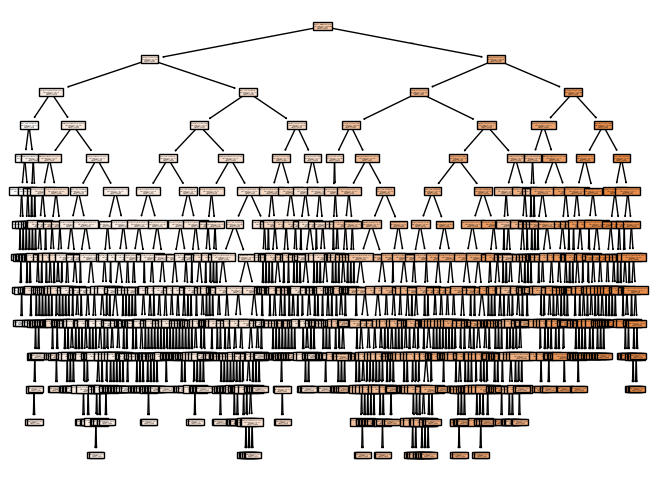

In [13]:
fig=plt.figure(figsize=(8,6))
tree.plot_tree(arbol_c, feature_names=list(X.columns.values),
              class_names = list(y.values), filled=True)
plt.show()

<h1>Tomando como "y" a 'Cooling_Load', la ultima columna</h1>

In [14]:
y = df.iloc[:,-1]
y.head(5)

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Cooling_Load, dtype: float64

In [15]:
modelo = DecisionTreeRegressor(random_state=None)

scores = cross_val_score(modelo, X, y,
                         scoring="r2",
                         cv=5, n_jobs=-1)
print(scores)
print(np.mean(scores))

[0.88932025 0.93480135 0.97335954 0.94896292 0.95799735]
0.9408882835862121


In [16]:
x_train, x_test, y_train, y_test = tts(X,y, test_size=0.2)
arbol_c = modelo.fit(x_train,y_train)
modelo.score(x_test,y_test)

0.9475343041971325

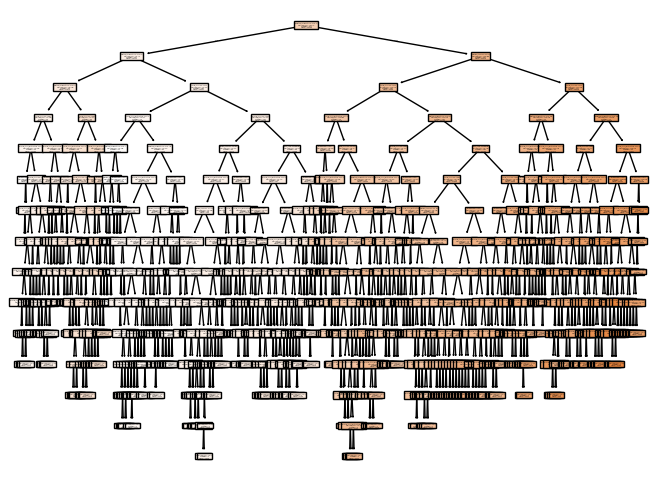

In [17]:
fig=plt.figure(figsize=(8,6))
tree.plot_tree(arbol_c, feature_names=list(X.columns.values),
              class_names = list(y.values), filled=True)
plt.show()